0.0001
0.2001
0.4001
0.6001000000000001
0.8001
1.0001
1.2001000000000002
1.4001000000000001
1.6001
1.8001
2.0001
2.2001000000000004
2.4001000000000006
2.6001000000000003
2.8001000000000005


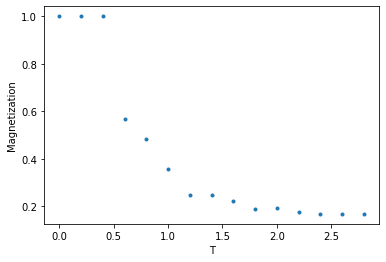

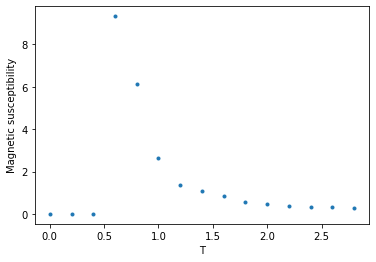

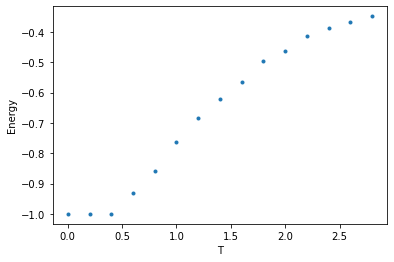

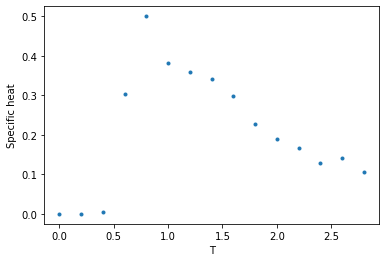

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mc_step(lattice, beta):
    """Single Monte Carlo step (includes N updates of spins)"""
    _, N = lattice.shape
    for i in range(N):
        # update(i, lattice, N, beta)
        update(np.random.randint(0, N), lattice, N, beta)


def get_energy(lattice):
    """Return energy per spin (total energy / N), J = 1"""
    E, E2 = 0, 0
    _, N = lattice.shape
    for i in range(N):
        temp = lattice[0, i] * lattice[0, (i + 1) % N]
        E -= temp
    return E / N


def update(index, lattice, N, T):
    """
    Update a single spin according to Metropolis algorithm.
    k = 1: Boltzmann constant

    Arguments:
        index (int): index of a chosen spin to update
        lattice (array): lattice of spins
        N (int): size of the lattice
        T (float): temperature
    """
    dE = 0
    for i in [index - 1, index + 1]:
        dE += lattice[0, i % N]
    dE = 2 * dE * lattice[0, index]
    if dE <= 0:
        lattice[0, index] *= -1
    elif np.exp(-dE / T) > np.random.rand():
        lattice[0, index] *= -1


def single_simulation(N, p, mc_steps, T, mc_steps_ave):
    lattice = np.random.choice([-1, 1], size=(1, N), p=[1 - p, p])

    M = np.zeros((1, mc_steps_ave))
    E = np.zeros((1, mc_steps_ave))

    for t in range(mc_steps):
        mc_step(lattice, T)
    for t in range(mc_steps_ave):
        M[0, t] = np.mean(lattice)
        E[0, t] = get_energy(lattice)
        mc_step(lattice, T)

    m_ave = np.mean(abs(M))  # magnetization
    E_ave = np.mean(E)  # energy
    X = (np.mean(M ** 2) - m_ave ** 2) / T * N  # magnetic susceptibility
    C = (np.mean(E ** 2) - E_ave ** 2) / T ** 2 * N  # specific heat
    return m_ave, E_ave, X, C


def monte_carlo_simulation(N, p, mc_steps, T, num, mc_steps_ave):
    mean_m, mean_E, mean_X, mean_C = 0, 0, 0, 0
    for i in range(num):
        m, E, X, C = single_simulation(N, p, mc_steps, T, mc_steps_ave)
        mean_m += m
        mean_E += E
        mean_X += X
        mean_C += C

    mean_m /= num
    mean_E /= num
    mean_X /= num
    mean_C /= num
    return mean_m, mean_E, mean_X, mean_C


T_min = 1e-4
T_max = 3
dT = 0.2
N = 50

T = np.arange(T_min, T_max, dT)
M = np.zeros(shape=T.shape)
E = np.zeros(shape=T.shape)
X = np.zeros(shape=T.shape)
C = np.zeros(shape=T.shape)

for i, temperature in enumerate(T):
    print(temperature)
    M[i], E[i], X[i], C[i] = monte_carlo_simulation(N, p=1, mc_steps=100, T=temperature, num=1, mc_steps_ave=1000)

plt.plot(T, M, '.')
plt.ylabel("Magnetization")
plt.xlabel("T")
plt.show()

plt.plot(T, X, '.')
plt.ylabel("Magnetic susceptibility")
plt.xlabel("T")
plt.show()

plt.plot(T, E, '.')
plt.ylabel("Energy")
plt.xlabel("T")
plt.show()

plt.plot(T, C, '.')
plt.ylabel("Specific heat")
plt.xlabel("T")
plt.show()